# MAZ Diplomarbeit - Biodiversität in der Schweiz#

## Die schwindende Vielfalt des Lebens##

Keine These, nur Fakten. Die Biodiversität in der Schweiz ist bedroht. Wie sieht es im internationalen Vergleich aus? Ich trage alle vom BAFU publizierten Roten Listen zusammen, stelle den internationalen Vergleich dazu, erkläre den Indikator "Rote Liste", lasse einen Biologen von Pro Natura zu Wort kommen und führe visuell durch die Geschichte der schwindenden Artenvielfalt und bedrohten Lebensräumen in unserem Land. 

Um einen Schweizer Überblick darstellen zu können, sammle ich alle Daten vom BAFU. Neuere Listen sind als Excel vorhanden, viele Rote Listen jedoch nur als pdf (generiertes pdf und Bild-pdf). Vorab wandle ich die Excel in csv (hatte Probleme mit den Schriftcodes für Sonderzeichen) und extrahiere die Daten der pdf mit Tabula.

Ich benötige vor allem Pandas und Matplotlib um die reduzierten Daten als Übersicht abbilden zu können. Die ganzen, unterschiedlichen Datengrundlagen werden als einheitliche Listen umgebaut, damit ich einzelne taxonomische Familien zu Gruppen zusammenfassen kann oder umgekehrt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# einlesen des csv:

In [3]:
df = pd.read_csv("01_source/xls_ch/amphibien_ch.csv")

In [4]:
# Übersicht über den Datensatz verschaffen. 
# Vor allem die len-Funktion gibt Auskunft über die erfassten Spezies der Listen...(später dazu mehr...)

In [5]:
df.head()

,classe,ordre,famille,genre,espèce,D,statut CH,critères,Bemerkungen
0,Amphibia,Urodela,Salamandridae,Salamandra,atra,Alpensalamander,LC,NaN,Leichte Abnahme der Bestände
1,Amphibia,Urodela,Salamandridae,Salamandra,salamandra,Feuersalamander,VU,"A3c,e",Unerklärter Rückgang geht vermutlich weiter
2,Amphibia,Urodela,Salamandridae,Triturus,alpestris,Bergmolch,LC,NaN,NaN
3,Amphibia,Urodela,Salamandridae,Triturus,carnifex,Italienischer Kammmolch,EN,"B2a, B2b(ii, iv)",Natürlicherweise kleines Verbreitungsgebiet in...
4,Amphibia,Urodela,Salamandridae,Triturus,cristatus,Kammmolch,EN,"A2c, B2a, B2b(ii, iv)",NaN


In [6]:
df.tail()

,classe,ordre,famille,genre,espèce,D,statut CH,critères,Bemerkungen
16,Amphibia,Anura,Ranidae,Rana,dalmatina,Springfrosch,EN,"B2a, B2b(ii, iv)",Natürlicherweise kleines Verbreitungsgebiet in...
17,Amphibia,Anura,Ranidae,Rana,esculenta/lessonae,Wasserfrosch-Komplex,NT,NaN,Abnahme der Bestände nicht ausreichend für VU
18,Amphibia,Anura,Ranidae,Rana,latastei,Italienischer Springfrosch,VU,"C2a(ii), D2",NaN
19,Amphibia,Anura,Ranidae,Rana,ridibunda,Seefrosch,NE,NaN,Eingeschleppte Art
20,Amphibia,Anura,Ranidae,Rana,temporaria,Grasfrosch,LC,NaN,NaN


In [7]:
len (df)

21

In [8]:
df.shape

(21, 9)

In [9]:
# Ich möchte es wissen: wie viele Amphibien sind gefährdet?

In [10]:
df["statut CH"].value_counts()

EN    9
VU    4
LC    3
DD    2
RE    1
NT    1
NE    1
Name: statut CH, dtype: int64

In [11]:
# Zurück zum Code: um nachher Listen sauber zusammen führen zu können, benenne ich die Columns
# in jedem einzelnen Notebook gleich um

In [12]:
df.rename(columns={"classe":"group","ordre":"order","famille":"family","genre":"genus","espèce":"species","D":"dt_name","statut CH":"cat","critères":"criteria", "Bemerkungen":"bemerkungen"},inplace=True)

In [13]:
df

,group,order,family,genus,species,dt_name,cat,criteria,bemerkungen
0,Amphibia,Urodela,Salamandridae,Salamandra,atra,Alpensalamander,LC,NaN,Leichte Abnahme der Bestände
1,Amphibia,Urodela,Salamandridae,Salamandra,salamandra,Feuersalamander,VU,"A3c,e",Unerklärter Rückgang geht vermutlich weiter
2,Amphibia,Urodela,Salamandridae,Triturus,alpestris,Bergmolch,LC,NaN,NaN
3,Amphibia,Urodela,Salamandridae,Triturus,carnifex,Italienischer Kammmolch,EN,"B2a, B2b(ii, iv)",Natürlicherweise kleines Verbreitungsgebiet in...
4,Amphibia,Urodela,Salamandridae,Triturus,cristatus,Kammmolch,EN,"A2c, B2a, B2b(ii, iv)",NaN
5,Amphibia,Urodela,Salamandridae,Triturus,helveticus,Fadenmolch,VU,"A2c, B2a, B2b(ii, iv)",NaN
6,Amphibia,Urodela,Salamandridae,Triturus,vulgaris,Teichmolch,EN,"A2c, B2a, B2b(ii, iv)",NaN
7,Amphibia,Anura,Discoglossidae,Alytes,obstetricans,Geburtshelferkröte,EN,A2c,NaN
8,Amphibia,Anura,Discoglossidae,Bombina,variegata,Gelbbauchunke,EN,A2c,NaN
9,Amphibia,Anura,Pelobatidae,Pelobates,fuscus,Knoblauchkröte,DD,NaN,"Unklar, ob es in der Schweiz je Populationen gab"


In [14]:
# Vom Zusammentragen der einzelnen Dokumente weiss ich, dass ich gewisse Columns nicht mehr brauchen werde.
# Um alles möglichst schlank halten zu können, poppe ich nicht benötigtes weg...

In [15]:
df.pop("genus")
df.pop ("species")

0                   atra
1             salamandra
2              alpestris
3               carnifex
4              cristatus
5             helveticus
6               vulgaris
7           obstetricans
8              variegata
9                 fuscus
10                  bufo
11              calamita
12               viridis
13               arborea
14            intermedia
15               arvalis
16             dalmatina
17    esculenta/lessonae
18              latastei
19             ridibunda
20            temporaria
Name: species, dtype: object

In [16]:
df.pop("criteria")

0                       NaN
1                     A3c,e
2                       NaN
3          B2a, B2b(ii, iv)
4     A2c, B2a, B2b(ii, iv)
5     A2c, B2a, B2b(ii, iv)
6     A2c, B2a, B2b(ii, iv)
7                       A2c
8                       A2c
9                       NaN
10                      A2c
11                      A2c
12                      NaN
13                      A2c
14         B2a, B2b(ii, iv)
15                      NaN
16         B2a, B2b(ii, iv)
17                      NaN
18              C2a(ii), D2
19                      NaN
20                      NaN
Name: criteria, dtype: object

In [17]:
df

,group,order,family,dt_name,cat,bemerkungen
0,Amphibia,Urodela,Salamandridae,Alpensalamander,LC,Leichte Abnahme der Bestände
1,Amphibia,Urodela,Salamandridae,Feuersalamander,VU,Unerklärter Rückgang geht vermutlich weiter
2,Amphibia,Urodela,Salamandridae,Bergmolch,LC,NaN
3,Amphibia,Urodela,Salamandridae,Italienischer Kammmolch,EN,Natürlicherweise kleines Verbreitungsgebiet in...
4,Amphibia,Urodela,Salamandridae,Kammmolch,EN,NaN
5,Amphibia,Urodela,Salamandridae,Fadenmolch,VU,NaN
6,Amphibia,Urodela,Salamandridae,Teichmolch,EN,NaN
7,Amphibia,Anura,Discoglossidae,Geburtshelferkröte,EN,NaN
8,Amphibia,Anura,Discoglossidae,Gelbbauchunke,EN,NaN
9,Amphibia,Anura,Pelobatidae,Knoblauchkröte,DD,"Unklar, ob es in der Schweiz je Populationen gab"


In [18]:
# Damit ich später mit dem Append-Befehl die Listen sauber zusammenführen kann (z.B. für Insekten),
# füge ich zwei neue Kolonnen an; einmal mit der einteilung in die Tiergruppe, einmal die Untergruppe.

In [19]:
df['einteilung'] = 'Amphibien'

In [20]:
df

,group,order,family,dt_name,cat,bemerkungen,einteilung
0,Amphibia,Urodela,Salamandridae,Alpensalamander,LC,Leichte Abnahme der Bestände,Amphibien
1,Amphibia,Urodela,Salamandridae,Feuersalamander,VU,Unerklärter Rückgang geht vermutlich weiter,Amphibien
2,Amphibia,Urodela,Salamandridae,Bergmolch,LC,NaN,Amphibien
3,Amphibia,Urodela,Salamandridae,Italienischer Kammmolch,EN,Natürlicherweise kleines Verbreitungsgebiet in...,Amphibien
4,Amphibia,Urodela,Salamandridae,Kammmolch,EN,NaN,Amphibien
5,Amphibia,Urodela,Salamandridae,Fadenmolch,VU,NaN,Amphibien
6,Amphibia,Urodela,Salamandridae,Teichmolch,EN,NaN,Amphibien
7,Amphibia,Anura,Discoglossidae,Geburtshelferkröte,EN,NaN,Amphibien
8,Amphibia,Anura,Discoglossidae,Gelbbauchunke,EN,NaN,Amphibien
9,Amphibia,Anura,Pelobatidae,Knoblauchkröte,DD,"Unklar, ob es in der Schweiz je Populationen gab",Amphibien


In [21]:
# Nun gehts an einen Plot. Rote Liste oder nicht? Ja, nein, keine Daten - ein Pie-Chart bietet sich an.

In [22]:
df["cat"].value_counts()

EN    9
VU    4
LC    3
DD    2
RE    1
NT    1
NE    1
Name: cat, dtype: int64

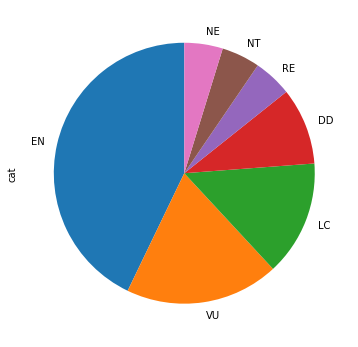

In [23]:
series=df["cat"].value_counts()
series.plot.pie(startangle=90, figsize=(6, 6))

In [24]:
# AAARRRRGHHH!!!! Und so soll er bestimmt nicht aussehen! Grauseliges, unleserliches Zeugs! 
# Google muss helfen, und nach ein paar Abfragen kann ich den Chart sinnvoll und besser lesbar aufhübschen...

In [25]:
df["cat"].value_counts()

EN    9
VU    4
LC    3
DD    2
RE    1
NT    1
NE    1
Name: cat, dtype: int64

In [26]:
# Lesbare Chartlösung mit Hilfe von Listen. So kann ich die Farben sinnvoll vergeben und die Labels sauber beschriften.
# Dazu unbedingt die Funktion, dass der Pie bei 90° beginnt, im Gegenuhrzeigersinn läuft, einen Titel und eine 
# Legende bekommt.

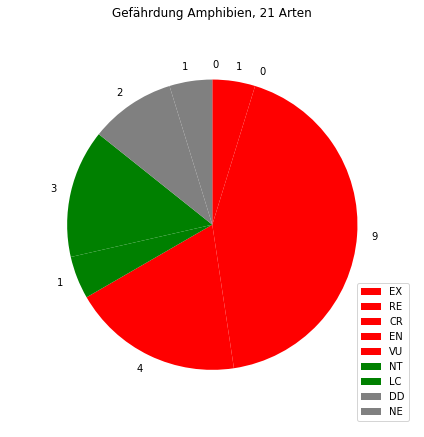

In [27]:
values = [0, 1, 0, 9, 4, 1, 3, 2, 1]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = ['EX', 'RE', 'CR', 'EN', 'VU',"NT","LC","DD","NE"]

fig1, ax1 = plt.subplots(figsize=(8, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=False,startangle=90, radius=0.9)
plt.title('Gefährdung Amphibien, 21 Arten')
plt.legend(labels,loc=4)
plt.show()

In [28]:
# Klarere Darstellung, die nach einem Sahnehäubchen schreit. Ich möchte gleich die Prozente ausrechnen und dazu-
# stellen. Das darf in Zukunft gerne Python für mich übernehmen. Mit googeln komme ich meiner Lösung näher 
# (von diversen Tipps zusammengestellt)

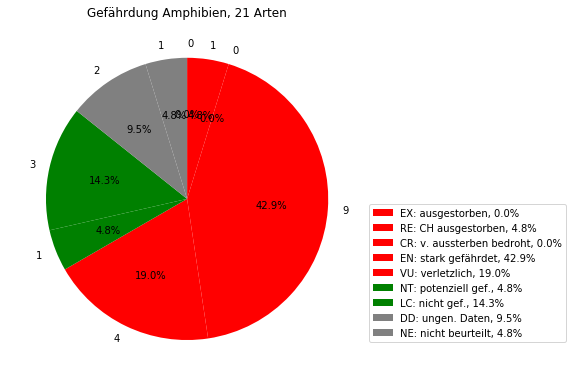

In [29]:
values = [0, 1, 0, 9, 4, 1, 3, 2, 1]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values,autopct='%1.1f%%',counterclock=False,startangle=90)
plt.title('Gefährdung Amphibien, 21 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [30]:
# Letztes Detail: Die unleserliche Prozent-Beschriftung innerhalb des Charts muss weg und nur in der Legende stehen.

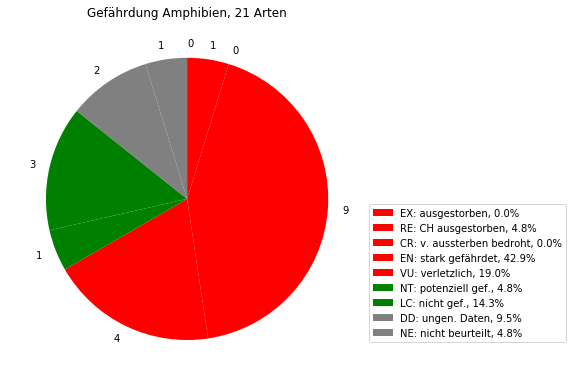

In [31]:
values = [0, 1, 0, 9, 4, 1, 3, 2, 1]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Amphibien, 21 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [32]:
# So werde ich alle Dokumente durcharbeiten. Die Farbgebung oben zeigt auch, welche Kategorien zur Roten Liste 
# gehören... Rot: bedroht, grün: nicht bedroht, grau: zu wenig Daten oder nicht beurteilte Art